## import & Load

In [12]:
# from datetime import timedelta
import cv2
import numpy as np
import os
# from tqdm import tqdm
from tqdm.notebook import tqdm
import glob
import matplotlib.pyplot as plt
from PIL import Image
import shutil

import torch
import torchvision.transforms as transforms

## some util
def print_img_stats(*imgs):
    for img in imgs:
        print(img.shape, img.min(), img.max())
        
def load_uint8_img(img_path):
    """load img as uint8"""
    img = plt.imread(img_path)
    if img.max() < 100: # float
        img = (np.clip(img, 0, 1) * 255).astype(np.uint8)
    else:
        img = np.clip(img, 0, 255).astype(np.uint8)
    return img

In [13]:
%cd "/content/drive/MyDrive/Colab Notebooks/CMU/Capstone"

/content/drive/MyDrive/Colab Notebooks/CMU/Capstone


In [14]:
## process batch
# color thresholding var
def get_mask(img):
    _img = (img / 255).astype(np.float32)
    img_hsv = cv2.cvtColor(_img, cv2.COLOR_RGB2HSV_FULL)
    ## 0
#     mask = cv2.inRange(img_hsv, 
#                           (95, 0.4, 0.1), 
#                           (150,1, 1))
    ## 1
    mask = cv2.inRange(img_hsv, 
                          (85, 0.4, 0.1), 
                          (165,1, 1))
    
    mask = mask / 255
    # remove active noise in mask
    kernel = np.ones((3,3),np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=3)
    mask = cv2.dilate(mask, kernel, iterations=3)
    return mask

def replace_bg(in_folder, out_folder, texture_img, output_size=None, replace_just_one_ind=None):
    """ convert all img in in_folder """
    assert os.path.exists(in_folder)
    if not os.path.exists(out_folder):
        os.mkdir(out_folder)
    
    resize = True
    for img_name in tqdm(os.listdir(in_folder)):
        if not img_name.endswith(".jpg"):
            # if img_name == "label.txt":
            #     shutil.copy(os.path.join(in_folder, "label.txt"), out_folder)
            continue
        if replace_just_one_ind is not None and img_name != f"{replace_just_one_ind}.jpg":
            continue

        img = plt.imread(os.path.join(in_folder, img_name)).copy()
        mask = get_mask(img)
        if resize:
            texture_img = cv2.resize(texture_img, (img.shape[1],img.shape[0]), interpolation=cv2.INTER_LANCZOS4)
            resize=False
        img[mask.astype(bool)] = texture_img[mask.astype(bool)]
        if output_size:
            img = cv2.resize(img, output_size, cv2.INTER_LANCZOS4)
        merge_img = Image.fromarray(img)
        merge_img.save(os.path.join(out_folder, img_name))
    print(f"Save img from {in_folder} to {out_folder}")

In [ ]:
texture_img_root = "data/handpick_texture"
texture_list = os.listdir(texture_img_root)
video_folder_list = ["data/22_0_ipad_homog", "data/22_1_ipad_homog",
                     "data/22_0_phone_pruned","data/22_1_phone_pruned"]
output_root_folder = "data/synthetic_dataset"

for i,texture_name in tqdm(enumerate(texture_list)):
    in_folder = video_folder_list[i%len(video_folder_list)]
    video_name = in_folder.split("/")[-1]
    output_folder_name = video_name + "_" + os.path.splitext(texture_name)[0].replace(".","_")
    output_folder = os.path.join(output_root_folder, output_folder_name)
    os.makedirs(output_folder, exist_ok=True)

    # load texture
    texture_path = os.path.join(texture_img_root, texture_name)
    texture_img = load_uint8_img(texture_path)

    replace_bg(in_folder, output_folder, texture_img, (512,512))
    # img = plt.imread(texture_path)
    # print_img_stats(img)
    print("save to:", output_folder)


0it [00:00, ?it/s]

  0%|          | 0/3243 [00:00<?, ?it/s]

Save img from data/22_0_ipad_homog to data/synthetic_dataset/22_0_ipad_homog_Brick.0001
save to: data/synthetic_dataset/22_0_ipad_homog_Brick.0001


  0%|          | 0/1880 [00:00<?, ?it/s]

Save img from data/22_1_ipad_homog to data/synthetic_dataset/22_1_ipad_homog_Brick.0003
save to: data/synthetic_dataset/22_1_ipad_homog_Brick.0003


  0%|          | 0/3243 [00:00<?, ?it/s]

Save img from data/22_0_phone_pruned to data/synthetic_dataset/22_0_phone_pruned_Brick.0005
save to: data/synthetic_dataset/22_0_phone_pruned_Brick.0005


  0%|          | 0/1880 [00:00<?, ?it/s]

Save img from data/22_1_phone_pruned to data/synthetic_dataset/22_1_phone_pruned_Fabric.0001
save to: data/synthetic_dataset/22_1_phone_pruned_Fabric.0001


  0%|          | 0/3243 [00:00<?, ?it/s]

Save img from data/22_0_ipad_homog to data/synthetic_dataset/22_0_ipad_homog_Fabric.0013
save to: data/synthetic_dataset/22_0_ipad_homog_Fabric.0013


  0%|          | 0/1880 [00:00<?, ?it/s]

Save img from data/22_1_ipad_homog to data/synthetic_dataset/22_1_ipad_homog_Paintings.11.0003
save to: data/synthetic_dataset/22_1_ipad_homog_Paintings.11.0003


  0%|          | 0/3243 [00:00<?, ?it/s]

Save img from data/22_0_phone_pruned to data/synthetic_dataset/22_0_phone_pruned_43_c1l3
save to: data/synthetic_dataset/22_0_phone_pruned_43_c1l3


  0%|          | 0/1880 [00:00<?, ?it/s]

Save img from data/22_1_phone_pruned to data/synthetic_dataset/22_1_phone_pruned_146_c1l4r120
save to: data/synthetic_dataset/22_1_phone_pruned_146_c1l4r120


  0%|          | 0/3243 [00:00<?, ?it/s]

Save img from data/22_0_ipad_homog to data/synthetic_dataset/22_0_ipad_homog_160_c1l5r60
save to: data/synthetic_dataset/22_0_ipad_homog_160_c1l5r60


  0%|          | 0/1880 [00:00<?, ?it/s]

Save img from data/22_1_ipad_homog to data/synthetic_dataset/22_1_ipad_homog_183_c1l1r180
save to: data/synthetic_dataset/22_1_ipad_homog_183_c1l1r180


  0%|          | 0/3243 [00:00<?, ?it/s]

Save img from data/22_0_phone_pruned to data/synthetic_dataset/22_0_phone_pruned_195_c1l4
save to: data/synthetic_dataset/22_0_phone_pruned_195_c1l4


  0%|          | 0/1880 [00:00<?, ?it/s]

Save img from data/22_1_phone_pruned to data/synthetic_dataset/22_1_phone_pruned_213_c1l8r180
save to: data/synthetic_dataset/22_1_phone_pruned_213_c1l8r180


  0%|          | 0/3243 [00:00<?, ?it/s]

Save img from data/22_0_ipad_homog to data/synthetic_dataset/22_0_ipad_homog_226_c1l3r180
save to: data/synthetic_dataset/22_0_ipad_homog_226_c1l3r180


  0%|          | 0/1880 [00:00<?, ?it/s]

Save img from data/22_1_ipad_homog to data/synthetic_dataset/22_1_ipad_homog_Diagonal_cedar_pxr128
save to: data/synthetic_dataset/22_1_ipad_homog_Diagonal_cedar_pxr128


  0%|          | 0/3243 [00:00<?, ?it/s]

Save img from data/22_0_phone_pruned to data/synthetic_dataset/22_0_phone_pruned_Red_shingle_pxr128
save to: data/synthetic_dataset/22_0_phone_pruned_Red_shingle_pxr128


  0%|          | 0/1880 [00:00<?, ?it/s]

Save img from data/22_1_phone_pruned to data/synthetic_dataset/22_1_phone_pruned_Black_granite_pxr128
save to: data/synthetic_dataset/22_1_phone_pruned_Black_granite_pxr128


  0%|          | 0/3243 [00:00<?, ?it/s]

Save img from data/22_0_ipad_homog to data/synthetic_dataset/22_0_ipad_homog_Weathered_vertical_pxr128
save to: data/synthetic_dataset/22_0_ipad_homog_Weathered_vertical_pxr128


  0%|          | 0/1880 [00:00<?, ?it/s]

Save img from data/22_1_ipad_homog to data/synthetic_dataset/22_1_ipad_homog_Stucco_pxr128
save to: data/synthetic_dataset/22_1_ipad_homog_Stucco_pxr128


  0%|          | 0/3243 [00:00<?, ?it/s]

Save img from data/22_0_phone_pruned to data/synthetic_dataset/22_0_phone_pruned_American_cherry_pxr128
save to: data/synthetic_dataset/22_0_phone_pruned_American_cherry_pxr128


  0%|          | 0/1880 [00:00<?, ?it/s]

Save img from data/22_1_phone_pruned to data/synthetic_dataset/22_1_phone_pruned_Figured_yew_wood_pxr128
save to: data/synthetic_dataset/22_1_phone_pruned_Figured_yew_wood_pxr128


In [ ]:
# copy label
video_folder = "22_1_phone_pruned"
label_path = f"data/{video_folder}/label.txt"
out_folder_list = glob.glob(f"data/synthetic_dataset/{video_folder}*")
# out_folder_list

for out_folder in out_folder_list:
    shutil.copy(label_path, out_folder)
    print(f"save '{label_path}' to '{out_folder}'")

save 'data/22_1_phone_pruned/label.txt' to 'data/synthetic_dataset/22_1_phone_pruned_Fabric.0013'
save 'data/22_1_phone_pruned/label.txt' to 'data/synthetic_dataset/22_1_phone_pruned_Brick.0003'
save 'data/22_1_phone_pruned/label.txt' to 'data/synthetic_dataset/22_1_phone_pruned_Diagonal_cedar_pxr128'
save 'data/22_1_phone_pruned/label.txt' to 'data/synthetic_dataset/22_1_phone_pruned_195_c1l4'
save 'data/22_1_phone_pruned/label.txt' to 'data/synthetic_dataset/22_1_phone_pruned_Brick.0005'


In [ ]:
# rename folder _
texture_img_root = "data/synthetic_dataset"
texture_list = os.listdir(texture_img_root)
assert len(texture_list) == 20

for folder in texture_list:
    os.rename(os.path.join(texture_img_root,folder),
              os.path.join(texture_img_root,folder.replace(".","_")) )


In [ ]:
os.listdir(texture_img_root)

['22_0_ipad_homog_Red_shingle_pxr128',
 '22_1_ipad_homog_American_cherry_pxr128',
 '22_0_phone_pruned_183_c1l1r180',
 '22_1_phone_pruned_Fabric_0013',
 '22_0_ipad_homog_43_c1l3',
 '22_1_ipad_homog_Brick_0001',
 '22_0_phone_pruned_213_c1l8r180',
 '22_1_phone_pruned_Brick_0003',
 '22_0_ipad_homog_Figured_yew_wood_pxr128',
 '22_1_ipad_homog_Weathered_vertical_pxr128',
 '22_0_phone_pruned_Black_granite_pxr128',
 '22_1_phone_pruned_Diagonal_cedar_pxr128',
 '22_0_ipad_homog_Paintings_11_0003',
 '22_1_ipad_homog_160_c1l5r60',
 '22_0_phone_pruned_146_c1l4r120',
 '22_1_phone_pruned_195_c1l4',
 '22_0_ipad_homog_226_c1l3r180',
 '22_1_ipad_homog_Stucco_pxr128',
 '22_0_phone_pruned_Fabric_0001',
 '22_1_phone_pruned_Brick_0005']

## Recreate synthetic dataset for missing data during training

In [ ]:
!ls data/handpick_texture

146_c1l4r120.png  American_cherry_pxr128.tif  Fabric.0013.ppm
160_c1l5r60.png   Black_granite_pxr128.tif    Figured_yew_wood_pxr128.tif
183_c1l1r180.png  Brick.0001.ppm	      Paintings.11.0003.ppm
195_c1l4.png	  Brick.0003.ppm	      Red_shingle_pxr128.tif
213_c1l8r180.png  Brick.0005.ppm	      Stucco_pxr128.tif
226_c1l3r180.png  Diagonal_cedar_pxr128.tif   Weathered_vertical_pxr128.tif
43_c1l3.png	  Fabric.0001.ppm


In [23]:
## convert single img (change replace_bg)
texture_path = "data/handpick_texture/226_c1l3r180.png"
texture_img = load_uint8_img(texture_path)

in_folder = "data/22_0_ipad_homog"
# in_folder = "data/22_0_phone_pruned"
# out_folder = "data/22_0_phone_pruned_bg2wood"
# in_folder = "data/22_1_ipad_homog"

out_folder = "data/synthetic_dataset/22_0_ipad_homog_226_c1l3r180"

# replace_bg(in_folder, out_folder, texture_img)
replace_bg(in_folder, out_folder, texture_img, (512,512))


  0%|          | 0/3243 [00:00<?, ?it/s]

Save img from data/22_0_ipad_homog to data/synthetic_dataset/22_0_ipad_homog_226_c1l3r180


In [26]:
## check syn data count
labels = np.loadtxt(f"{out_folder}/label.txt")
print(f"{len(labels)} labels")
print(len(os.listdir(out_folder)), "files")

3242 labels
3243 files


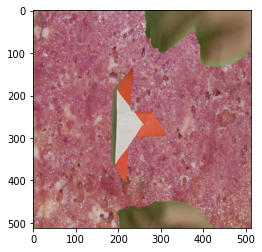

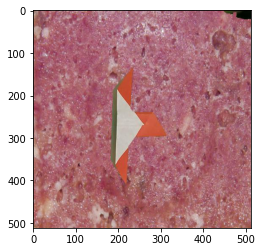

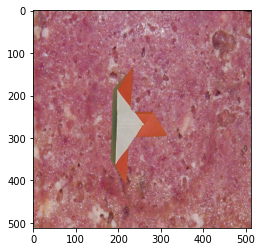

In [ ]:
img = plt.imread("data/synthetic_dataset/22_0_ipad_homog_226_c1l3r180/2882.jpg")
plt.imshow(img)
plt.show()
img = plt.imread("data/synthetic_dataset/22_0_ipad_homog_226_c1l3r180/2883.jpg")
plt.imshow(img)
plt.show()
img = plt.imread("data/synthetic_dataset/22_0_ipad_homog_226_c1l3r180/2884.jpg")
plt.imshow(img)
plt.show()

(800, 1200, 3) 0 230
0.739809375
0.7458822916666666


Text(0.5, 1.0, ' texture')

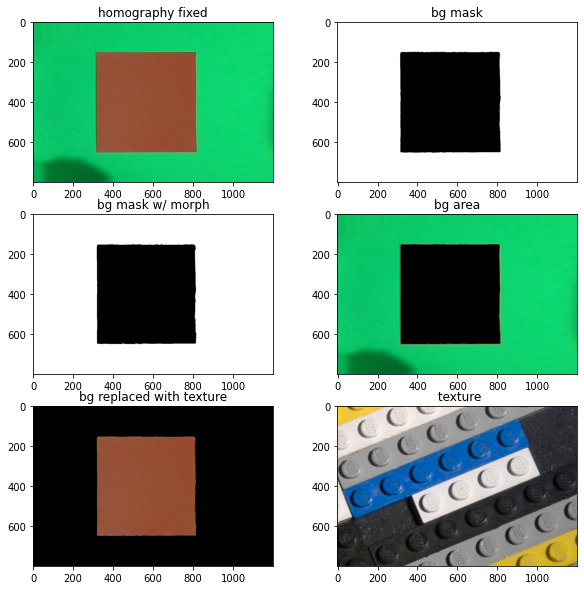

In [ ]:
### debug
# # color thresholding: https://colorizer.org
# R,C = 3,2
# plt.figure(figsize=(10,10))

# # load cropped img
# # img_path = "/Users/jameschen/Desktop/16621 MSCV Capstone/Project/Code/data/22_0_ipad_homog3/85.jpg"
# # img_path = "/Users/jameschen/Desktop/16621 MSCV Capstone/Project/Code/data/22_0_ipad_homog3/1089.jpg"
# # img_path = "/Users/jameschen/Desktop/16621 MSCV Capstone/Project/Code/data/22_0_ipad_homog3/1579.jpg"
# # img_path = "/Users/jameschen/Desktop/16621 MSCV Capstone/Project/Code/data/22_0_ipad_homog3/2079.jpg"
# # img_path = "/Users/jameschen/Desktop/16621 MSCV Capstone/Project/Code/data/22_0_ipad_homog3/2579.jpg"
# # img_path = "/Users/jameschen/Desktop/16621 MSCV Capstone/Project/Code/data/22_1_ipad_homog/162.jpg"
# # img_path = "/Users/jameschen/Desktop/16621 MSCV Capstone/Project/Code/data/22_1_ipad_homog/1.jpg"
# # img_path = "/Users/jameschen/Desktop/16621 MSCV Capstone/Project/Code/data/22_0_phone_pruned/22.jpg"
# img_path = "/content/drive/MyDrive/Colab Notebooks/CMU/Capstone/data/22_1_ipad_homog/0.jpg"
# img = plt.imread(img_path)
# print_img_stats(img)
# plt.subplot(R,C,1)
# plt.imshow(img)
# plt.title("homography fixed")

# ### define color filter
# # img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV_FULL)
# # mask = cv2.inRange(img_hsv, 
# #                       (int(95/360*255), int(0.4*255), int(0.1*255)), 
# #                       (int(150/360*255),int(1*255), int(1*255)))

# _img = (img / 255).astype(np.float32)
# img_hsv = cv2.cvtColor(_img, cv2.COLOR_RGB2HSV_FULL)
# mask = cv2.inRange(img_hsv, 
#                       (85, 0.4, 0.1), 
#                       (165,1, 1))

# # img_hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS_FULL)
# # mask = cv2.inRange(img_hls, 
# #                   (int(70/360*255), int(0.2*255), int(0.5*255)), 
# #                   (int(150/360*255),int(0.8*255), int(1*255)))

# mask = mask / 255
# plt.subplot(R,C,2)
# plt.imshow(mask,"gray")
# plt.title("bg mask")
# print(mask.mean())

# # remove active noise in mask
# kernel = np.ones((3,3),np.uint8)
# mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=3)
# # kernel = np.ones((3,3),np.uint8)
# mask = cv2.dilate(mask, kernel, iterations=3)
# plt.subplot(R,C,3)
# plt.imshow(mask,"gray")
# plt.title("bg mask w/ morph")
# print(mask.mean())

# # show bg area
# img_bg = img.copy()
# img_bg[~ mask.astype(bool)] = 0
# plt.subplot(R,C,4)
# plt.imshow(img_bg)
# plt.title("bg area")

# # load texture
# texture_path = "/content/drive/MyDrive/Colab Notebooks/CMU/Capstone/data/handpick_texture/146_c1l4r120.png"
# texture_img = plt.imread(texture_path)
# # texture_img = texture_img.transpose(1,0,2)
# texture_img = cv2.resize(texture_img, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_LANCZOS4)

# # show bg-replaced img
# img_masked_w_text = img.copy()
# img_masked_w_text[mask.astype(bool)] = texture_img[mask.astype(bool)]
# plt.subplot(R,C,5)
# plt.imshow(img_masked_w_text,)
# plt.title("bg replaced with texture")

# plt.subplot(R,C,6)
# plt.imshow(texture_img)
# plt.title(" texture")

# # Image.fromarray(img_masked_w_text).save("temp2.jpg")
# ## 0.8439291666666666




In [ ]:
print_img_stats()

(800, 1200, 3) -0.07021743 1.0546265
